In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
x_train = pd.read_csv('Logistic_X_Train.csv')
y_train = pd.read_csv('Logistic_Y_Train.csv')
x_test = pd.read_csv('Logistic_X_Test.csv')

In [60]:
x = x_train.values
print(x.shape)
y = y_train.values
y = y.reshape(2250,)
print(y.shape)
z = x_test.values

(2250, 2)
(2250,)


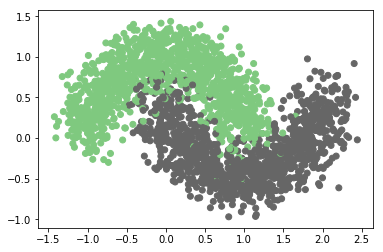

In [61]:

plt.scatter(x[:,0], x[:,1], c=y, cmap = plt.cm.Accent)
plt.show()

In [68]:
def sigmoid(z):
    return (1.0)/(1 + np.exp(-z))
def predict(x, weights):
    z = np.dot(x, weights)
    pred = sigmoid(z)
    return pred
def loss(x, y, weights):
    y_ = predict(x, weights)
    cost = np.mean(-y*np.log(y_) - (1-y)*np.log(1-y_))
    return cost
def update(x, y, weights, lr):
    y_ = predict(x, weights)
    dw = np.dot(x.T, y_ - y)
    m = x.shape[0]
    weights = weights - lr*dw/float(m)
    return weights
def train(x, y, lr = 0.5, maxepochs = 100):
    ones = np.ones((x.shape[0], 1))
    x = np.hstack((ones,x))
    weights = np.zeros(x.shape[1])
    for epoch in range(maxepochs):
        weights = update(x, y, weights, lr)
        if epoch%10 == 0:#update after every 10 epochs
            l = loss(x, y, weights)
            print("epoch %d loss %.4f" %(epoch,l))
    return weights
        


In [69]:
weights = train(x, y)
print(weights)

epoch 0 loss 0.6468
epoch 10 loss 0.4500
epoch 20 loss 0.3915
epoch 30 loss 0.3636
epoch 40 loss 0.3469
epoch 50 loss 0.3356
epoch 60 loss 0.3273
epoch 70 loss 0.3210
epoch 80 loss 0.3160
epoch 90 loss 0.3119
[ 0.00922671  1.31030655 -2.94507408]


In [72]:
def getpred(z, weights, labels = True):
    if z.shape[1] != weights.shape[0]:
        ones = np.ones((z.shape[0], 1))
        z = np.hstack((ones,z))
    probs = predict(z, weights)
    if not labels:
        return  probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs >= 0.5] = 1
        return labels

In [74]:
arr = getpred(z, weights )
print(arr)

[0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.

In [76]:
df = pd.DataFrame(arr)
df.columns = ['y']
df.to_csv('submission_classify_points.csv', encoding = 'utf-8', index = False)